Below is LR image r06cad2d6t.png，its rating is 1 


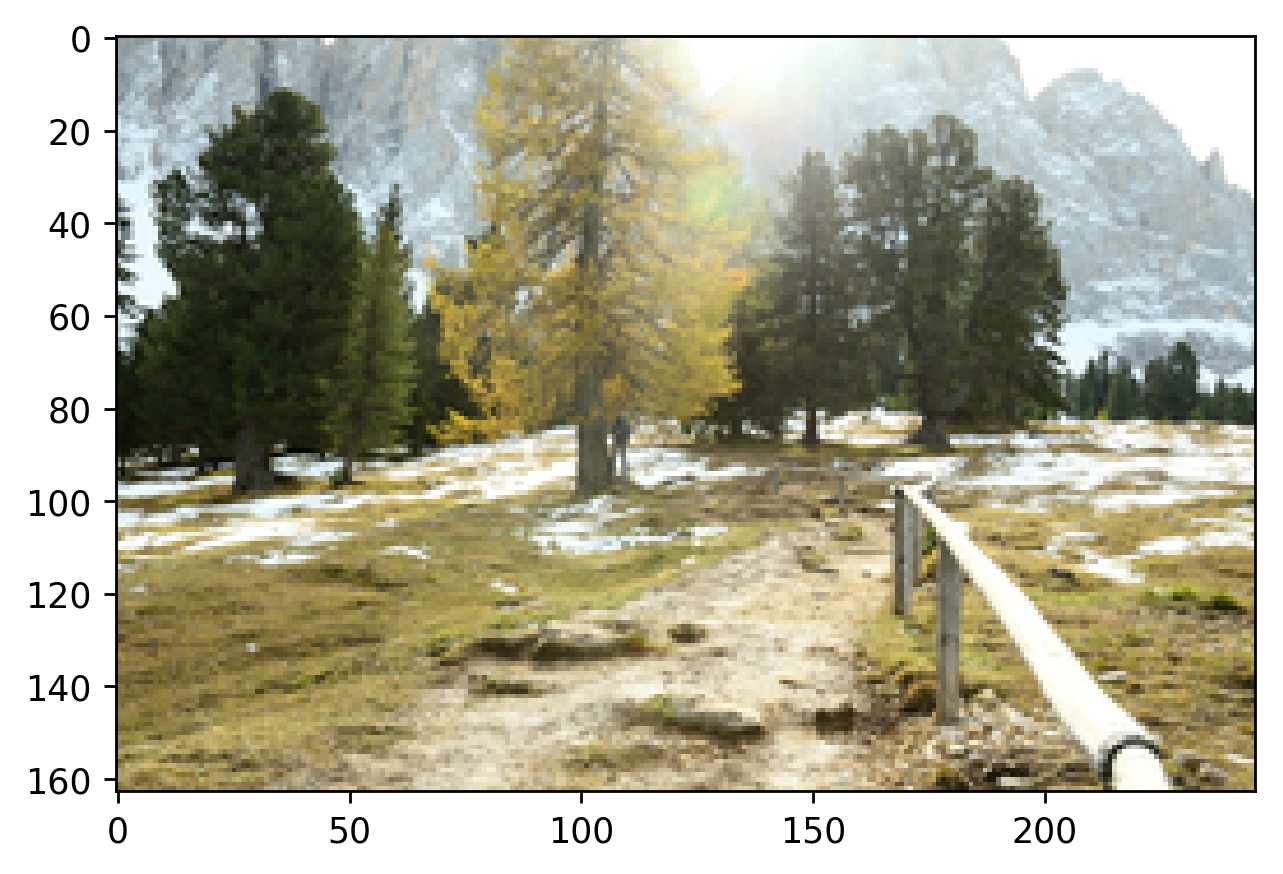

Below is HR image r06cad2d6t.png，its rating is 5


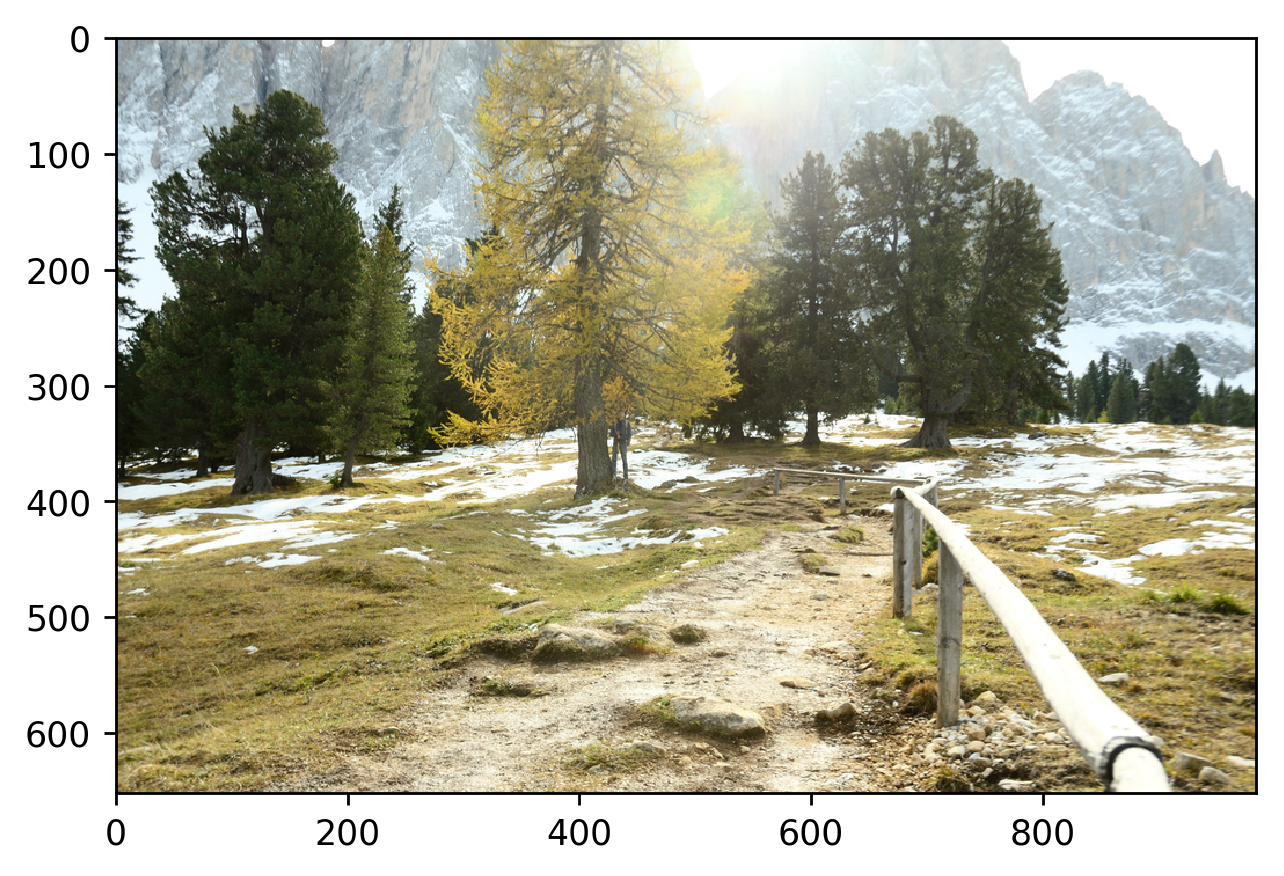

Below is output for Interpolated_bicubic model


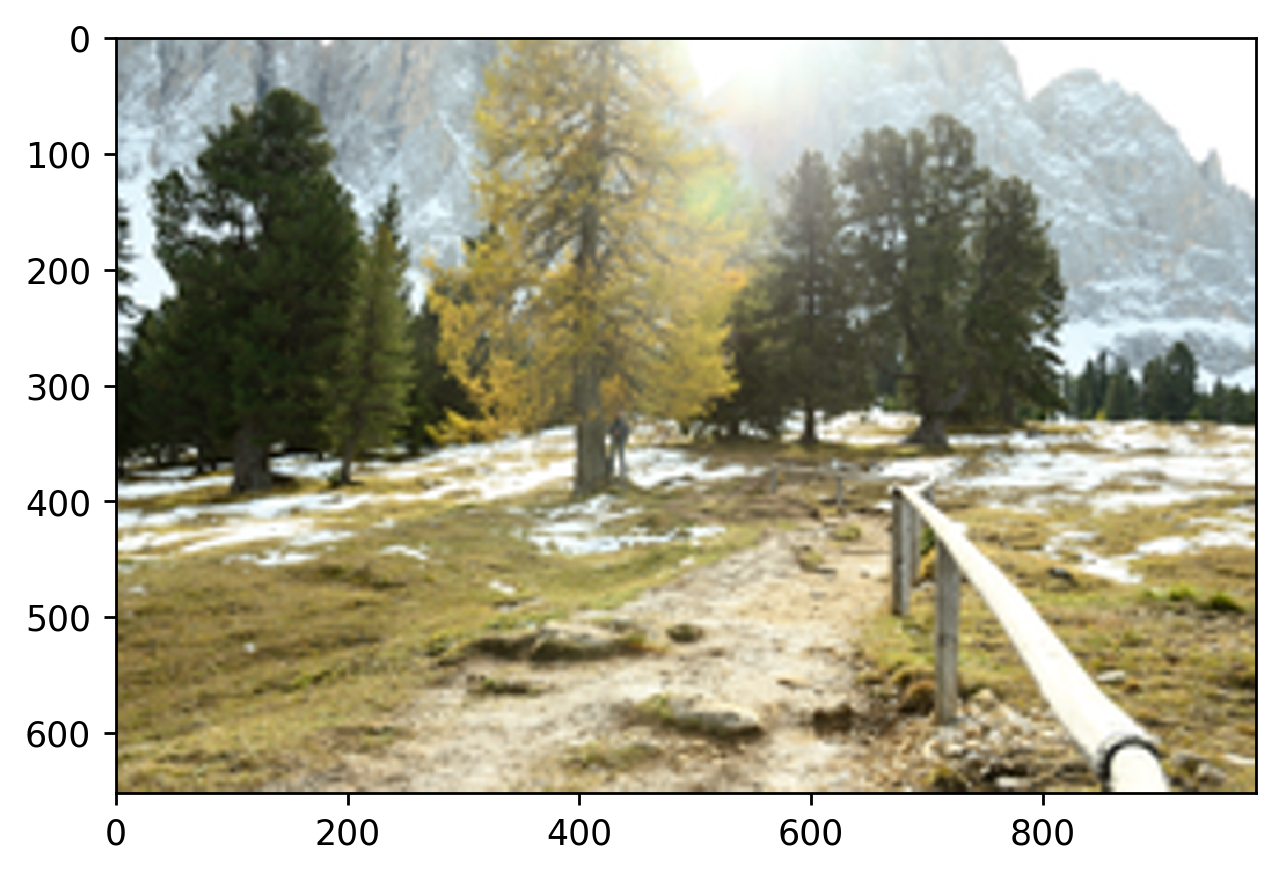

In [ ]:
%matplotlib inline
import sys,fileinput
from os import  listdir
import os
from os.path import isdir, join,isfile
import scipy.misc
from matplotlib import pyplot as plt
from IPython.display import clear_output
import matplotlib as mpl
from random import shuffle,sample
import time


# Adjust your resolution here
mpl.rcParams['figure.dpi'] = 250



plt.ion()

main_dir = "/Users/zhangqixiang/Desktop/tmp"

LR_dir = join(main_dir,'LR_test')
HR_dir = join(main_dir,'HR_test')

for f in sample(listdir(LR_dir), len(listdir(LR_dir)))[:10]:
    f_stat_MOS = open(join(main_dir , 'MOS_stats.txt'), 'a+')
    lr_img = scipy.misc.imread(join(LR_dir,f))
    hr_img = scipy.misc.imread(join(HR_dir,f))
    
    print "Below is LR image %s，its rating is 1 " % f
    plt.imshow(lr_img)
    plt.show(block=False)

    
    print "Below is HR image %s，its rating is 5" % f
    plt.imshow(hr_img)
    plt.show(block=False)
    
    for model_dir in listdir(join(main_dir,'Models')):
        
        if isdir(join(main_dir,'Models',model_dir)):
            print "Below is output for %s model" % (model_dir)
            cur_dir = join(main_dir,'Models',model_dir,'images')
            f_split = str(f).split('.')
            if isfile(join(cur_dir,f)):
                plt.imshow(scipy.misc.imread(join(cur_dir,f) ))
                plt.show(block=False)
            else:
                plt.imshow(scipy.misc.imread(join(cur_dir,f_split[0]+'-outputs.png')))
                plt.show(block=False)
            time.sleep(.1)
            try:
                score = int( raw_input("rate 1-5 for resolution of above image: "))
                
                if score >=1 and score <=5: f_stat_MOS.write ("%s \t %s \t %f \n" %(f,model_dir,score))

            except:
                pass
        
    clear_output()  
    f_stat_MOS.close()
    
        
    
